# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ajedw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('news_api.env')
api_key = os.getenv('newsapi')

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q= 'bitcoin',
    language = 'en',
    page_size = 100,
    sort_by = 'relevancy')

In [5]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q= 'ethereum',
    language = 'en',
    page_size = 100,
    sort_by = 'relevancy')

In [6]:
# Create the Bitcoin sentiment scores DataFrame
def sentiment_score(articles_list):
    sentiments_list = []

    for article in articles_list["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments_list.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass

        
    # Create DataFrame
    senitment_df = pd.DataFrame(sentiments_list)

    
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    senitment_df = senitment_df[cols]
    
    return senitment_df




bitcoin_sentiment_score = sentiment_score(bitcoin_articles)
bitcoin_sentiment_score.sort_values(by= ["date"], ascending=True).head()

,date,text,compound,positive,negative,neutral
39,2021-11-26,"SAN SALVADOR, Nov 26 (Reuters) - El Salvador P...",0.3400,0.068,0.000,0.932
94,2021-11-27,"Matthew Heard, a software engineer from San Jo...",-0.2960,0.000,0.058,0.942
47,2021-11-29,MicroStrategy CEO Michael SaylorJoe Raedle/Get...,0.3182,0.067,0.000,0.933
48,2021-11-29,Bitcoin balloon.Andriy Onufriyenko\r\n<ul><li>...,0.4019,0.110,0.054,0.836
30,2021-11-29,BitcoinFrancesco Carta fotografo\r\nCryptocurr...,0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment_score = sentiment_score(ethereum_articles)
ethereum_sentiment_score.sort_values(by= ["date"], ascending=True).head()

,date,text,compound,positive,negative,neutral
93,2021-11-27,Sam Bankman-Fried cofounded FTX in 2019 and is...,0.3612,0.067,0.000,0.933
25,2021-11-29,"In a constantly changing business world, entre...",0.3995,0.114,0.041,0.845
52,2021-11-29,SOPA Images/Getty ImagesSOPA Images/Getty Imag...,0.0258,0.037,0.000,0.963
54,2021-11-29,The photo shows physical imitations of cryptoc...,0.0000,0.000,0.000,1.000
61,2021-11-29,What we've been thinking: We've spoken at leng...,0.2023,0.049,0.000,0.951


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_score.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.120000,0.065730,0.036400,0.89786
std,0.370774,0.071607,0.056665,0.09279
min,-0.802000,0.000000,0.000000,0.66000
25%,-0.006450,0.000000,0.000000,0.84475
50%,0.000000,0.055000,0.000000,0.91950
75%,0.426225,0.114000,0.066000,1.00000
max,0.927500,0.327000,0.246000,1.00000


In [9]:
# Describe the Ethereum Sentiment
ethereum_sentiment_score.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.164661,0.076580,0.034060,0.889300
std,0.394248,0.079706,0.055335,0.096075
min,-0.802000,0.000000,0.000000,0.640000
25%,0.000000,0.000000,0.000000,0.823750
50%,0.128000,0.068500,0.000000,0.918500
75%,0.406800,0.126000,0.063250,0.958000
max,0.946000,0.360000,0.246000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A:  Eth had the highest mean positive score.

Q: Which coin had the highest compound score?

A: Eth also had the highest max compound score.

Q. Which coin had the highest positive score?

A: Eth had the highest max positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
stop_words2 = {'said'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    re_words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lemmatize = [lemmatizer.lemmatize(word) for word in re_words]
    lemmatize_verbs = [lemmatizer.lemmatize(word, pos ='v') for word in lemmatize]
   
    # Convert the words to lowercase & Remove the stop words
    tokens = [word.lower() for word in lemmatize_verbs 
                  if word.lower() not in stop_words.union(stop_words2)]

    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_sentiment_score['token'] = [tokenizer(text) for text in bitcoin_sentiment_score['text']]
bitcoin_sentiment_score.head()

,date,text,compound,positive,negative,neutral,token
0,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922,"[image, source, afp, via, getty, imagesimage, ..."
1,2021-12-06,The plant opening northeast of Niagara Falls t...,0.0000,0.000,0.000,1.000,"[plant, open, northeast, niagara, falls, month..."
2,2021-12-01,"Earlier this year, Nothing released a pair of ...",0.5106,0.099,0.000,0.901,"[earlier, year, nothing, release, pair, relati..."
3,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858,"[dec, reuters, us, securities, exchange, commi..."
4,2021-12-12,People aren't done hijacking major politicians...,0.5267,0.112,0.000,0.888,"[people, arent, hijack, major, politician, twi..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_sentiment_score['token'] = [tokenizer(text) for text in ethereum_sentiment_score['text']]
ethereum_sentiment_score.head()

,date,text,compound,positive,negative,neutral,token
0,2021-12-02,Blockchain startup MonoX Finance said on Wedne...,-0.0516,0.074,0.079,0.847,"[blockchain, startup, monox, finance, say, wed..."
1,2021-11-30,"On Monday, Budweiser joined the non-fungible t...",-0.1531,0.000,0.045,0.955,"[monday, budweiser, join, nonfungible, token, ..."
2,2021-12-01,"Earlier this year, Nothing released a pair of ...",0.5106,0.099,0.000,0.901,"[earlier, year, nothing, release, pair, relati..."
3,2021-12-10,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.000,1.000,"[white, castle, double, cheeseburgererin, mcdo..."
4,2021-12-10,"Nicholas Merten , an expert in cryptography, p...",0.4939,0.119,0.000,0.881,"[nicholas, merten, expert, cryptography, predi..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
def bigramize(sentiment_score_df, N):    
    corpus = [ ' '.join(list) for list in sentiment_score_df['token']]
    big_string =  ' '.join(corpus)
    token = word_tokenize(big_string)
    bigram = ngrams(token, n= N)
    
    return bigram

bitcoin_bigram = bigramize(bitcoin_sentiment_score, 2)

In [17]:
# Generate the Ethereum N-grams where N=2
ethereum_bigram = bigramize(ethereum_sentiment_score, 2)

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_bigram_count = pd.DataFrame(token_count(bitcoin_bigram,10))
bitcoin_bigram_count.head(10)

,0,1
0,"(dec, reuters)",16
1,"(char, dec)",9
2,"(reuters, bitcoin)",6
3,"(char, bitcoin)",6
4,"(digital, currency)",6
5,"(computer, scientist)",5
6,"(world, largest)",5
7,"(largest, cryptocurrency)",5
8,"(last, week)",5
9,"(illustration, take)",4


In [20]:
# Use token_count to get the top 10 words for Ethereum
ethereum_bigram_count = pd.DataFrame(token_count(ethereum_bigram,10))
ethereum_bigram_count.head(10)

,0,1
0,"(dec, reuters)",13
1,"(char, dec)",7
2,"(nonfungible, token)",5
3,"(ear, earbuds)",4
4,"(digital, asset)",4
5,"(reuters, bitcoin)",4
6,"(venture, capital)",4
7,"(say, wednesday)",3
8,"(th, char)",3
9,"(digital, currency)",3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

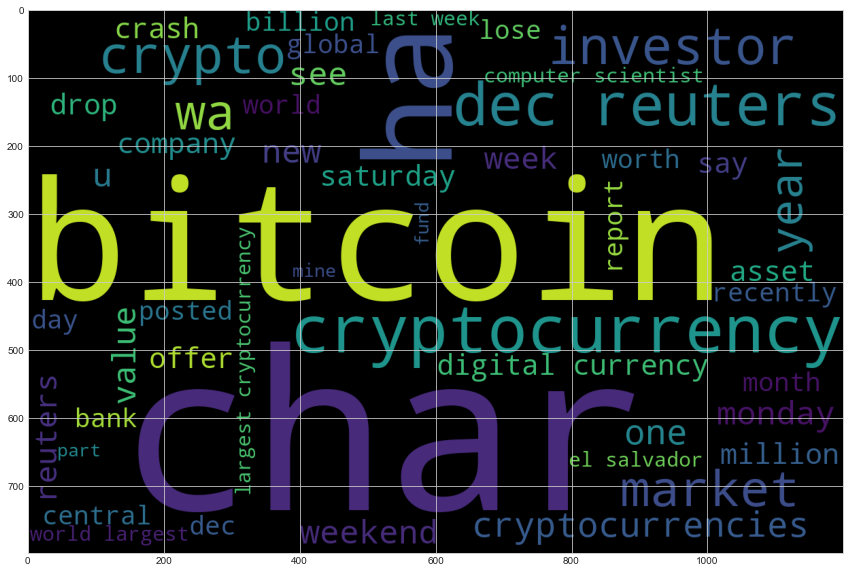

In [22]:
# Generate the Bitcoin word cloud
def bigstring(sentiment_score_df):    
    corpus = [ ' '.join(list) for list in sentiment_score_df['token']]
    big_string =  ' '.join(corpus)
    
    return big_string

input_bitcoin = bigstring(bitcoin_sentiment_score)

wc_bit = WordCloud(width=1200, height=800, max_words=50).generate(input_bitcoin)
plt.imshow(wc_bit);

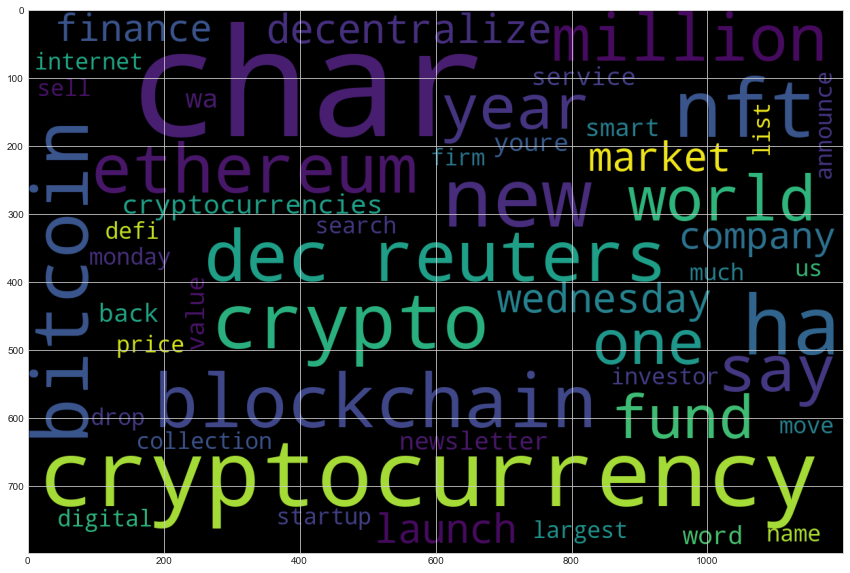

In [23]:
# Generate the Ethereum word cloud
input_eth = bigstring(ethereum_sentiment_score)

wc_eth = WordCloud(width=1200, height=800, max_words=50).generate(input_eth)
plt.imshow(wc_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

ModuleNotFoundError: No module named 'spacy'

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
corpus_bitcoin = ''
for text in bitcoin_sentiment_score['text']:
    corpus_bitcoin += text + ' ' 

In [ ]:
# Run the NER processor on all of the text
tokens_bitcoin = nlp(corpus_bitcoin)

# Add a title to the document
tokens_bitcoin.user_data["title"] = "Bitcoin's news named entity recognition"

In [ ]:
# Render the visualization
displacy.render(tokens_bitcoin, style="ent")

In [ ]:
# List all Entities
list_ent_bitcoin = [(ent.text , ent.label_) for ent in tokens_bitcoin.ents]
list_ent_bitcoin

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
corpus_ethereum = ''
for text in ethereum_sentiment_score['text']:
    corpus_ethereum += text + ' ' 

In [ ]:
# Run the NER processor on all of the text
tokens_ethereum = nlp(corpus_ethereum)

# Add a title to the document
tokens_ethereum.user_data["title"] = "ETH's News named entity recognition"

In [ ]:
# Render the visualization
displacy.render(tokens_ethereum, style="ent")

In [ ]:
# List all Entities
# List all Entities
list_ent_eth = [(ent.text , ent.label_) for ent in tokens_ethereum.ents if not ent.label_ == ("CARDINAL" and 'MONEY') ]
list_ent_eth

---